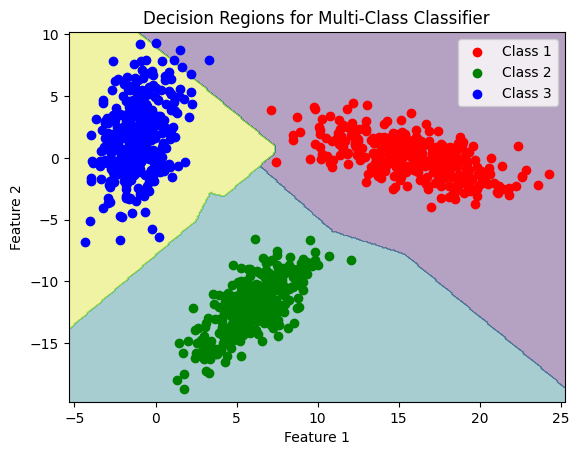

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Data
def load_data(file_paths):
    # Load data from all CSV files
    data_classes = [pd.read_csv(file_path).values for file_path in file_paths]
    return data_classes

# Step 2: Compute Covariance Matrices
def compute_covariances(data, option):
    mus = [np.mean(d, axis=0) for d in data]
    
    if option == 1:
        # Option 1: Z = σ² * I (Identity matrix with averaged variance)
        variances = [np.var(d, axis=0) for d in data]
        avg_variance = np.mean([np.mean(var) for var in variances])
        Z = avg_variance * np.eye(len(mus[0]))  # Identity matrix scaled by average variance
        Z_inv = np.linalg.inv(Z)
        Z_invs = [Z_inv] * len(data)  # Same covariance for all classes

    elif option == 2:
        # Option 2: Full Covariance matrix, same for all classes (Σ)
        covariances = [np.cov(d, rowvar=False) for d in data]
        Z = np.mean(covariances, axis=0)  # Average covariance matrix
        Z_inv = np.linalg.inv(Z)
        Z_invs = [Z_inv] * len(data)  # Same covariance for all classes

    elif option == 3:
        # Option 3: Diagonal Covariance matrix, different for each class
        Z_invs = []
        for d in data:
            variances = np.var(d, axis=0)
            Z = np.diag(variances)  # Diagonal matrix with variances
            Z_inv = np.linalg.inv(Z)
            Z_invs.append(Z_inv)

    elif option == 4:
        # Option 4: Full Covariance matrix, different for each class
        Z_invs = []
        for d in data:
            Z = np.cov(d, rowvar=False)  # Full covariance matrix for each class
            Z_inv = np.linalg.inv(Z)
            Z_invs.append(Z_inv)

    else:
        raise ValueError("Invalid option. Please choose a valid option (1, 2, 3, or 4).")
    
    return mus, Z_invs

# Decision function for two classes using the selected covariance matrices
def decision_function(x, mu_i, mu_j, Z_inv, P_C_i, P_C_j):
    mu_diff = mu_i - mu_j
    log_prior_ratio = np.log(P_C_i / P_C_j)
    g_x = (Z_inv @ mu_diff).T @ x - 0.5 * (Z_inv @ mu_diff).T @ (mu_i + mu_j) + log_prior_ratio
    return g_x

# Classify a point using all pairs of classes
def classify_point(x, mus, Z_invs, priors):
    num_classes = len(mus)
    scores = np.zeros(num_classes)
    
    # Compare each class against every other class
    for i in range(num_classes):
        for j in range(num_classes):
            if i != j:
                score = decision_function(x, mus[i], mus[j], Z_invs[i], priors[i], priors[j])
                if score > 0:
                    scores[i] += 1
                else:
                    scores[j] += 1
    
    # Determine the class with the highest score
    return np.argmax(scores)

# Plotting the decision regions
def plot_decision_regions(data_classes, mus, Z_invs, priors):
    # Determine the plot boundaries
    all_data = np.vstack(data_classes)
    x_min, x_max = all_data[:, 0].min() - 1, all_data[:, 0].max() + 1
    y_min, y_max = all_data[:, 1].min() - 1, all_data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z_grid = np.array([classify_point(np.array([x, y]), mus, Z_invs, priors) for x, y in zip(xx.ravel(), yy.ravel())])
    Z_grid = Z_grid.reshape(xx.shape)

    plt.contourf(xx, yy, Z_grid, alpha=0.4)

    # Plot data points for each class
    colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']  # Add more colors if needed
    for i, data_class in enumerate(data_classes):
        plt.scatter(data_class[:, 0], data_class[:, 1], color=colors[i % len(colors)], label=f'Class {i+1}')
    
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Regions for Multi-Class Classifier')
    plt.show()

# Main function to run the classifier
def main(file_paths, covariance_option):
    # Step 1: Load the data
    data_classes = load_data(file_paths)
    
    # Step 2: Calculate statistics
    mus, Z_invs = compute_covariances(data_classes, covariance_option)

    # Calculate prior probabilities for each class
    total_samples = sum(len(d) for d in data_classes)
    priors = [len(d) / total_samples for d in data_classes]

    # Step 4: Plot decision regions
    plot_decision_regions(data_classes, mus, Z_invs, priors)

# Example usage
file_paths = ['Group13\\LS_Group13\\train\\class1.csv', 'Group13\\LS_Group13\\train\\class2.csv', 'Group13\\LS_Group13\\train\\class3.csv']  # Replace with your actual file paths
covariance_option = 4  # Choose from options 1, 2, 3, or 4
main(file_paths, covariance_option)


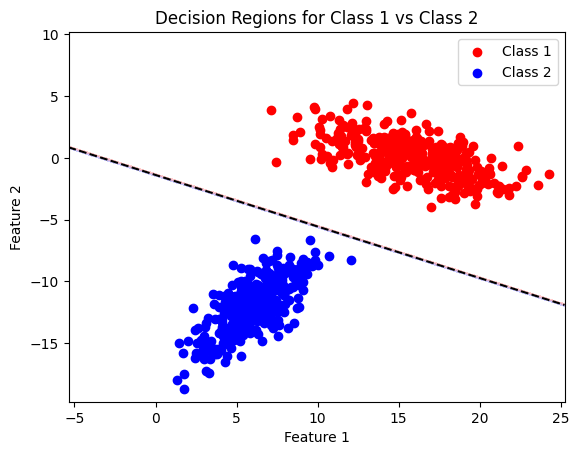

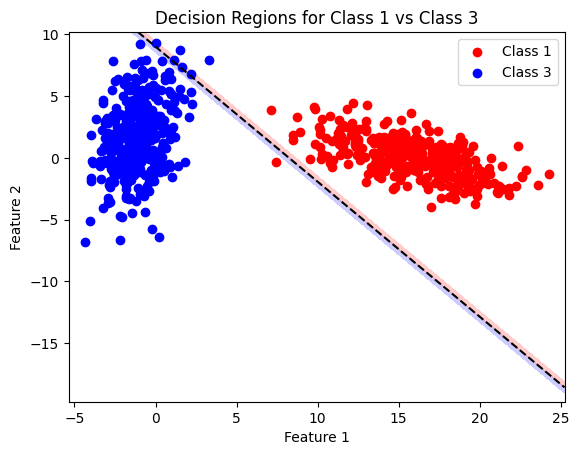

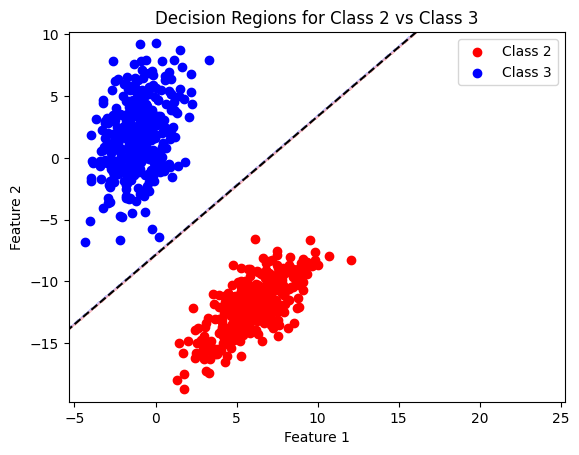

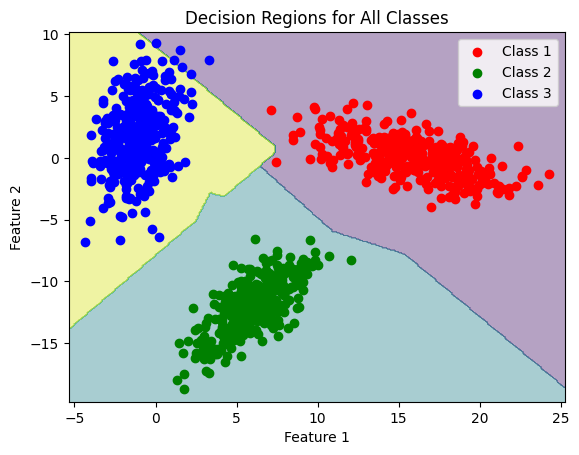

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Data
def load_data(file_paths):
    # Load data from all CSV files
    data_classes = [pd.read_csv(file_path).values for file_path in file_paths]
    return data_classes

# Step 2: Compute Covariance Matrices
def compute_covariances(data, option):
    mus = [np.mean(d, axis=0) for d in data]
    
    if option == 1:
        # Option 1: Z = σ² * I (Identity matrix with averaged variance)
        variances = [np.var(d, axis=0) for d in data]
        avg_variance = np.mean([np.mean(var) for var in variances])
        Z = avg_variance * np.eye(len(mus[0]))  # Identity matrix scaled by average variance
        Z_inv = np.linalg.inv(Z)
        Z_invs = [Z_inv] * len(data)  # Same covariance for all classes

    elif option == 2:
        # Option 2: Full Covariance matrix, same for all classes (Σ)
        covariances = [np.cov(d, rowvar=False) for d in data]
        Z = np.mean(covariances, axis=0)  # Average covariance matrix
        Z_inv = np.linalg.inv(Z)
        Z_invs = [Z_inv] * len(data)  # Same covariance for all classes

    elif option == 3:
        # Option 3: Diagonal Covariance matrix, different for each class
        Z_invs = []
        for d in data:
            variances = np.var(d, axis=0)
            Z = np.diag(variances)  # Diagonal matrix with variances
            Z_inv = np.linalg.inv(Z)
            Z_invs.append(Z_inv)

    elif option == 4:
        # Option 4: Full Covariance matrix, different for each class
        Z_invs = []
        for d in data:
            Z = np.cov(d, rowvar=False)  # Full covariance matrix for each class
            Z_inv = np.linalg.inv(Z)
            Z_invs.append(Z_inv)

    else:
        raise ValueError("Invalid option. Please choose a valid option (1, 2, 3, or 4).")
    
    return mus, Z_invs

# Decision function for two classes using the selected covariance matrices
def decision_function(x, mu_i, mu_j, Z_inv, P_C_i, P_C_j):
    mu_diff = mu_i - mu_j
    log_prior_ratio = np.log(P_C_i / P_C_j)
    g_x = (Z_inv @ mu_diff).T @ x - 0.5 * (Z_inv @ mu_diff).T @ (mu_i + mu_j) + log_prior_ratio
    return g_x

# Classify a point using all pairs of classes
def classify_point(x, mus, Z_invs, priors):
    num_classes = len(mus)
    scores = np.zeros(num_classes)
    
    # Compare each class against every other class
    for i in range(num_classes):
        for j in range(num_classes):
            if i != j:
                score = decision_function(x, mus[i], mus[j], Z_invs[i], priors[i], priors[j])
                if score > 0:
                    scores[i] += 1
                else:
                    scores[j] += 1
    
    # Determine the class with the highest score
    return np.argmax(scores)

# Plotting decision regions between each pair of classes
def plot_pairwise_decision_regions(data_classes, mus, Z_invs, priors):
    num_classes = len(data_classes)
    all_data = np.vstack(data_classes)
    x_min, x_max = all_data[:, 0].min() - 1, all_data[:, 0].max() + 1
    y_min, y_max = all_data[:, 1].min() - 1, all_data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    for i in range(num_classes):
        for j in range(i+1, num_classes):
            Z_grid = np.array([decision_function(np.array([x, y]), mus[i], mus[j], Z_invs[i], priors[i], priors[j]) 
                               for x, y in zip(xx.ravel(), yy.ravel())])
            Z_grid = Z_grid.reshape(xx.shape)

            # Plot decision boundary and regions
            plt.contourf(xx, yy, Z_grid, alpha=0.4, levels=[-1, 0, 1], cmap=plt.cm.bwr)
            plt.contour(xx, yy, Z_grid, levels=[0], colors='k', linestyles='--')
            plt.scatter(data_classes[i][:, 0], data_classes[i][:, 1], color='red', label=f'Class {i+1}')
            plt.scatter(data_classes[j][:, 0], data_classes[j][:, 1], color='blue', label=f'Class {j+1}')
            plt.legend()
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.title(f'Decision Regions for Class {i+1} vs Class {j+1}')
            plt.show()


# Plotting the decision regions for all classes together
def plot_combined_decision_regions(data_classes, mus, Z_invs, priors):
    # Determine the plot boundaries
    all_data = np.vstack(data_classes)
    x_min, x_max = all_data[:, 0].min() - 1, all_data[:, 0].max() + 1
    y_min, y_max = all_data[:, 1].min() - 1, all_data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z_grid = np.array([classify_point(np.array([x, y]), mus, Z_invs, priors) for x, y in zip(xx.ravel(), yy.ravel())])
    Z_grid = Z_grid.reshape(xx.shape)

    plt.contourf(xx, yy, Z_grid, alpha=0.4)

    # Plot data points for each class
    colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']  # Add more colors if needed
    for i, data_class in enumerate(data_classes):
        plt.scatter(data_class[:, 0], data_class[:, 1], color=colors[i % len(colors)], label=f'Class {i+1}')
    
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Regions for All Classes')
    plt.show()

# Main function to run the classifier
def main(file_paths, covariance_option):
    # Step 1: Load the data
    data_classes = load_data(file_paths)
    
    # Step 2: Calculate statistics
    mus, Z_invs = compute_covariances(data_classes, covariance_option)

    # Calculate prior probabilities for each class
    total_samples = sum(len(d) for d in data_classes)
    priors = [len(d) / total_samples for d in data_classes]

    # Step 3: Plot decision regions for each pair of classes
    plot_pairwise_decision_regions(data_classes, mus, Z_invs, priors)

    # Step 4: Plot combined decision regions for all classes if more than two classes
    if len(data_classes) > 2:
        plot_combined_decision_regions(data_classes, mus, Z_invs, priors)

# Example usage
file_paths = ['Group13\\LS_Group13\\train\\class1.csv', 'Group13\\LS_Group13\\train\\class2.csv', 'Group13\\LS_Group13\\train\\class3.csv']  # Replace with your actual file paths
covariance_option = 4  # Choose from options 1, 2, 3, or 4
main(file_paths, covariance_option)
